**COMS E6998.015 - PRAC DEEP LEARNING SYS - Fall 2024**

*Homework 1 Solutions || Submitted By: Vaibhaw K Shende, **vks2116** @ columbia.edu*

**Solution to Problem 5 - Parameter-Server (PS) based Asynchronous SGD training system**

The the staleness of $g[L_1, 1]$, $g[L_1, 2]$, $g[L_1, 3]$, $g[L_1, 4]$, $g[L_2, 1]$, $g[L_2, 2]$ are analyzed below, with a timeline view, and based on the order of gradient calculations and their updates.

**$g[L_1,1]$: at 1s**

	•	Learner 1 calculates g[L1,1] at second 1 and sends it to the PS.
	•	The PS updates the weights immediately after g[L1,1] is received.
	•	There are no prior weight updates before g[L1,1] was calculated.
	•	Staleness: 0 (i.e no weight updates occurred between the last read and this update).

**$g[L_1,2]$: at 2s**

	•	Learner 1 calculates g[L1,2] at second 2 and sends it to the PS.
	•	The PS updates the weights immediately after g[L1,2] is received.
	•	Learner 1 read the weights right after g[L1,1] update, so there was 1 update (due to g[L1,1]) before g[L1,2] was applied..
	•	Staleness: 1 (one update occurred before g[L1,2])
**$g[L_2,1]$: at 2.5s**

	•	Learner 2 calculates g[L2,1] at second 2.5 and sends it to the PS.
	•	The PS updates the weights immediately after g[L2,1] is received.
	•	Learner 2 read the weights last time at initialization, and since then g[L1,1]) and g[L1,2]) weights were applied.
	•	Staleness: 2 (two updates occurred before g[L2,1]).
**$g[L_1,3]$: at 3s**

	•	Learner 1 calculates g[L1,3] at second 3 and sends it to the PS.
	•	The PS updates the weights immediately after g[L1,3] is received.
	•	Learner 1 read the weights right after g[L1,2], so only g[L2,1] was applied since the last read.
	•	Staleness: 1 (one update occurred between g[L1,2] and g[L1,3]).
**$g[L_1,4]$: at 4s**

	•	Learner 1 calculates g[L1,4] at second 4 and sends it to the PS.
	•	The PS updates the weights immediately after g[L1,4] is received.
	•	Learner 1 read the weights right after g[L1,3], so no updates occurred in between.
	•	Staleness: 0 (no update occurred between g[L1,3] and g[L1,4]).
**$g[L_2,2]$: at 5s**

	•	Learner 2 calculates g[L2,2] at second 5 and sends it to the PS.
	•	The PS updates the weights immediately after g[L2,2] is received.
	•	Learner 2 read the weights right after g[L2,1], and since then, g[L1,3] and g[L1,4] were applied.
	•	Staleness: 2 (two updates occurred between g[L2,1] and g[L2,2]).


The Staleness, for the given timeline and learners, is summarized in the figure below.
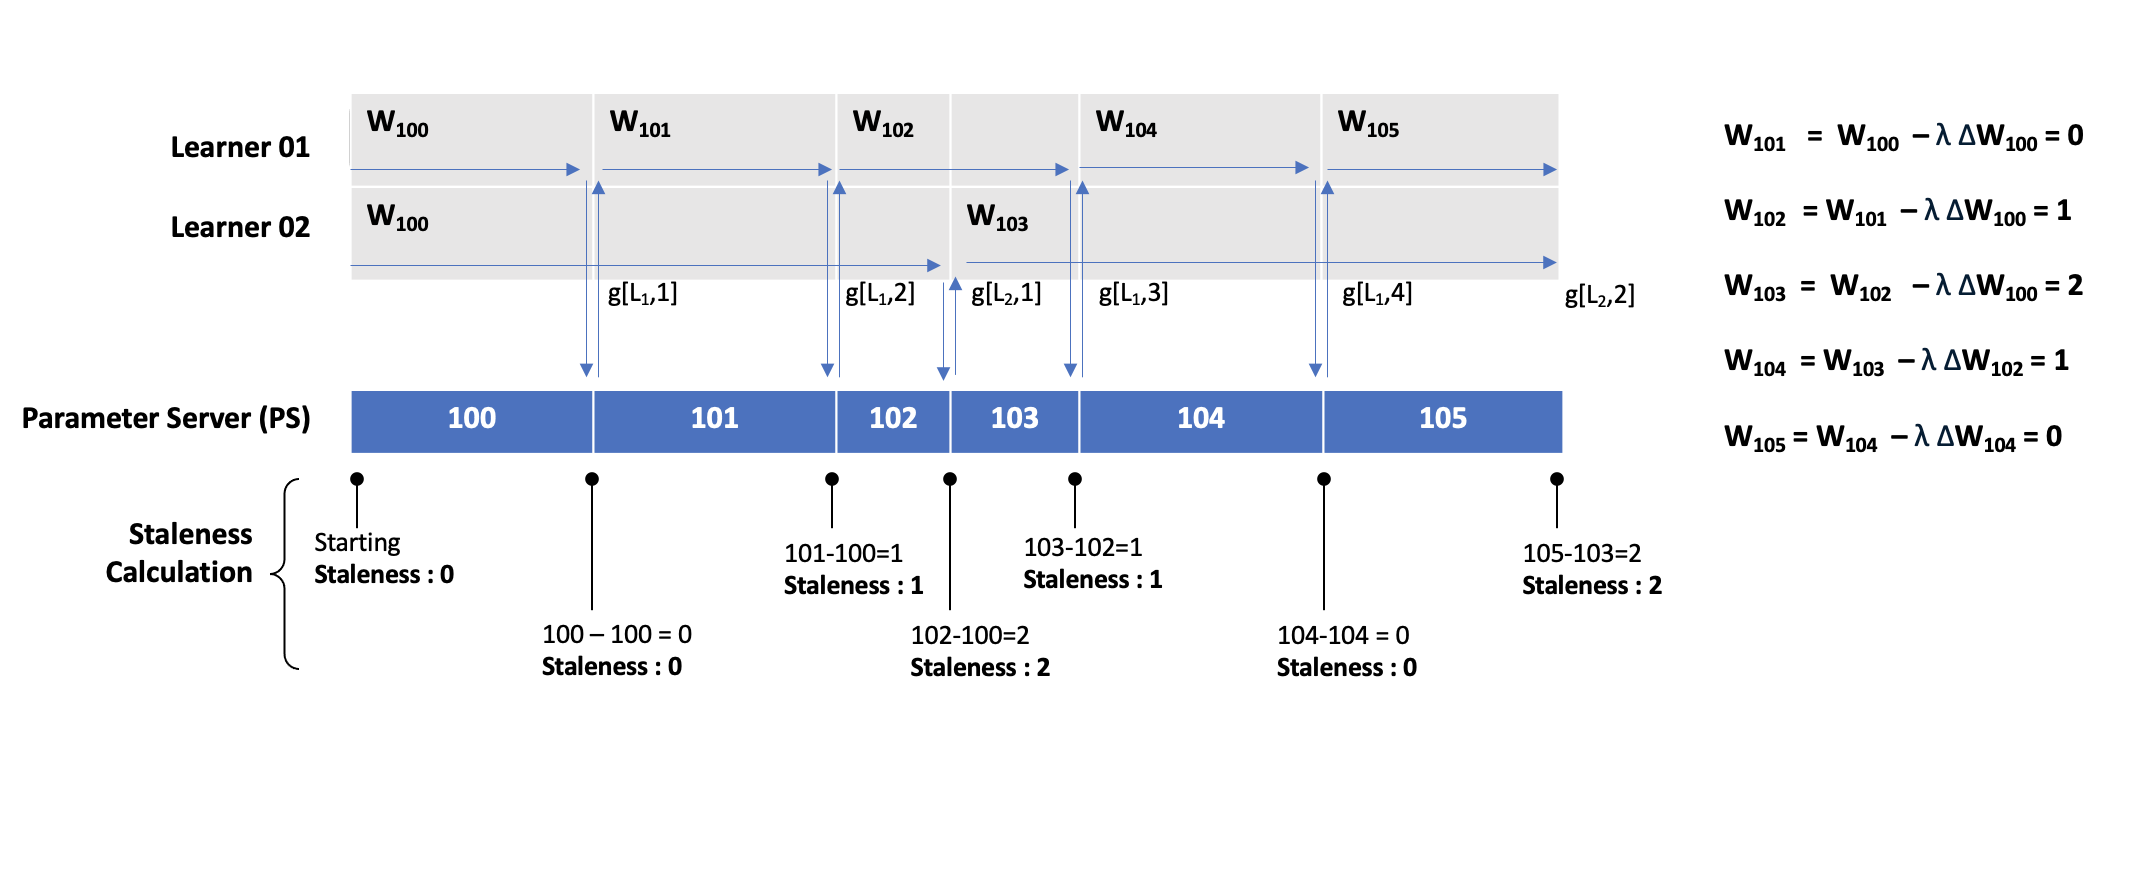